In [14]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [15]:
df = pd.read_csv('main_vars.csv',index_col=0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 410
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #                   411 non-null    object 
 1   country             411 non-null    object 
 2   gender              411 non-null    object 
 3   age                 411 non-null    int64  
 4   household_income    411 non-null    int64  
 5   education_level     411 non-null    int64  
 6   years_from_grad     411 non-null    float64
 7   previous_lang_perf  411 non-null    int64  
 8   previous_math_perf  411 non-null    int64  
 9   time_in_mins        411 non-null    int64  
 10  percent_viewed      411 non-null    float64
 11  views_number        411 non-null    float64
 12  learn_scores        411 non-null    float64
 13  cog_scores          411 non-null    float64
dtypes: float64(5), int64(6), object(3)
memory usage: 48.2+ KB


In [17]:
df.education_level

0      2
1      2
2      2
3      2
4      2
      ..
406    1
407    3
408    2
409    3
410    2
Name: education_level, Length: 411, dtype: int64

### Type casting

In [18]:
df.previous_lang_perf = df.previous_lang_perf.astype("category")
df.previous_math_perf = df.previous_math_perf.astype("category")
# df.household_income = df.household_income.astype("category")
# df.gender = df.gender.astype("category")

In [19]:
corr_matrix = df.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.15]
high_corr = high_corr.stack().reset_index()
high_corr.columns = ["Variable 1", "Variable 2", "Correlation"]
print(high_corr)

          Variable 1        Variable 2  Correlation
0                age               age     1.000000
1                age  household_income     0.214451
2                age   education_level     0.367293
3                age   years_from_grad     0.552562
4   household_income               age     0.214451
5   household_income  household_income     1.000000
6    education_level               age     0.367293
7    education_level   education_level     1.000000
8    years_from_grad               age     0.552562
9    years_from_grad   years_from_grad     1.000000
10      time_in_mins      time_in_mins     1.000000
11      time_in_mins      learn_scores     0.234064
12      time_in_mins        cog_scores     0.215618
13    percent_viewed    percent_viewed     1.000000
14    percent_viewed      views_number     0.189099
15      views_number    percent_viewed     0.189099
16      views_number      views_number     1.000000
17      learn_scores      time_in_mins     0.234064
18      lear

<AxesSubplot:>

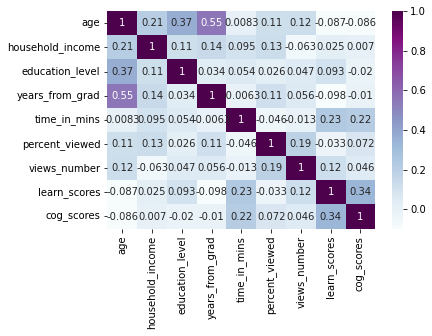

In [20]:
sns.heatmap(df.corr(), cmap="BuPu", annot=True)

In [21]:
df.head()

,#,country,gender,age,household_income,education_level,years_from_grad,previous_lang_perf,previous_math_perf,time_in_mins,percent_viewed,views_number,learn_scores,cog_scores
0,l57iwxvbsb30sjpuy45hil57iwntda7l,Kenya,Male,23,1,2,0.0,5,5,62,1.205,1.0,0.606954,1.204404
1,hml6linh2hxbyusch5khml6lxf31xwnj,Kenya,Male,28,1,2,6.0,5,5,39,100.000,1.0,-0.923318,-0.074773
2,mxyvt2njz01ozvgiam0y5jmxyvt2dsw5,Kenya,Male,29,2,2,-1.0,4,5,95,28.045,6.0,0.969199,-1.393694
3,n5mkklp55cke9kkpjn5mkk35oit8htru,Kenya,Male,21,2,2,-2.0,5,5,1,100.000,2.5,0.500109,1.124701
4,er329a654xjyg4w954ccpaer329az2ct,Kenya,Male,29,1,2,5.0,5,5,91,99.815,1.0,-0.057007,-0.098085


In [22]:
x_vars = df.iloc[:, 2:]
x_vars.pop("previous_lang_perf")
x_vars.pop("previous_math_perf")
# x_vars.pop("years_from_grad")
x_vars.pop("age")
x_vars.pop("percent_viewed")
y = x_vars.pop("learn_scores")

<AxesSubplot:>

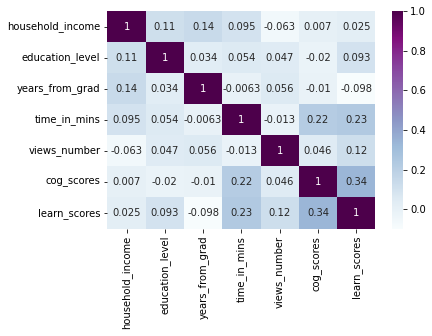

In [23]:
mp = x_vars.join(df.learn_scores)
sns.heatmap(mp.corr(), cmap="BuPu", annot=True)

In [24]:
mp.education_level.unique()

array([2, 3, 1], dtype=int64)

In [27]:
from statsmodels.formula.api import ols

fit = ols(
    "learn_scores ~ C(gender) + C(education_level, Treatment(1)) + C(household_income, Treatment(1)) + years_from_grad + views_number + time_in_mins + cog_scores",
    data=mp,
).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           learn_scores   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     8.751
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           5.92e-14
Time:                        16:06:50   Log-Likelihood:                -467.77
No. Observations:                 411   AIC:                             959.5
Df Residuals:                     399   BIC:                             1008.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.6277      0.174     -3.607      0.000      -0.970      -0.286
C(gender)[T.Male]                          0.0827      0.077      1.070      0.285      -0.069       0.235
C(education_level, Treatment(1))[T.2]      0.2651      0.152      1.742      0.082      -0.034       0.564
C(education_level, Treatment(1))[T.3]      0.3624      0.174      2.078      0.038       0.020       0.705
C(household_income, Treatment(1))[T.2]     0.1539      0.100      1.532      0.126      -0.044       0.351
C(household_income, Treatment(1))[T.3]     0.3245      0.131      2.478      0.014       0.067       0.582
C(household_income, Treatment(1))[T.4]     0.2092      0.143      1.458      0.145      -0.073       0.491
C(household_income, Treatment(1))[T.5]    -0.0455      0.119     -0.383      0.702      -0.279       0.188
years_from_grad                           -0.0315      0.012     -2.657      0.008      -0.055      -0.008
views_number                               0.0776      0.033      2.373      0.018       0.013       0.142
time_in_mins                               0.0032      0.001      2.951      0.003       0.001       0.005
cog_scores                                 0.2965      0.045      6.619      0.000       0.208       0.385
==============================================================================
Omnibus:                        1.061   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.588   Jarque-Bera (JB):                1.070
Skew:                          -0.004   Prob(JB):                        0.586
Kurtosis:                       2.750   Cond. No.                         437.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
sX = np.std(df["learn_scores"])
sY = np.std(df["cog_scores"])
r = 0.3238 / (sX * sY)
r**2

0.19255001193307766

In [29]:
r

0.43880520955553576

In [30]:
x = df.cog_scores
y = df.learn_scores
np.corrcoef(x,y)

array([[1.        , 0.33898081],
       [0.33898081, 1.        ]])

In [31]:
re = stats.linregress(x, y)
re.rvalue

0.33898081061417656